In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")

In [5]:
# Load the dataset
try:
    df = pd.read_csv('C:/Users/USER/Desktop/Projects/Insurance Risk Analytics/Insurance-Risk-Analytics/data/raw_insurance_data.csv',
        sep='|'
    )
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'raw_insurance_data.csv' was not found. Please check the file path.")
    exit()

C:\Users\USER\AppData\Local\Temp\ipykernel_10004\1812426783.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/USER/Desktop/Projects/Insurance Risk Analytics/Insurance-Risk-Analytics/data/raw_insurance_data.csv',


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [6]:
# --- Step 1: Clean Column Names ---
print("Original Columns:")
print(df.columns.tolist())

# Strip whitespace from column names
df.columns = df.columns.str.strip().str.lower()

print("\nCleaned Columns:")
print(df.columns.tolist())

Original Columns:
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

Cleaned Columns:
['underwrittencoverid', 'policyid', 'transactionmonth', 'isvatregistered', 'citizenship', 'legaltype', 'title', 'language', 'bank', 'accounttype', 'maritalstatus'

In [7]:
## Review Data Structure
print("\n--- Data Head ---")
print(df.head())

print("\n--- Data Information (Dtypes & Non-Null Counts) ---")
print(df.info())


--- Data Head ---
   underwrittencoverid  policyid     transactionmonth  isvatregistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  citizenship          legaltype title language                 bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       accounttype  ...                    excessselected covercategory  \
0  Current account  ...     

In [8]:
# Convert TransactionMonth to datetime objects
df['transactionmonth'] = pd.to_datetime(df['transactionmonth'])

In [9]:
## Check for missing values (Data Quality Assessment)
print("\n--- Missing Value Report ---")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Calculate percentage
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percent': missing_percent
})
print(missing_df)


--- Missing Value Report ---
                         Missing Count  Missing Percent
numberofvehiclesinfleet        1000098       100.000000
crossborder                     999400        99.930207
customvalueestimate             779642        77.956560
writtenoff                      641901        64.183810
converted                       641901        64.183810
rebuilt                         641901        64.183810
newvehicle                      153295        15.327998
bank                            145961        14.594670
accounttype                      40232         4.022806
gender                            9536         0.953507
maritalstatus                     8259         0.825819
mmcode                             552         0.055195
vehicletype                        552         0.055195
make                               552         0.055195
vehicleintrodate                   552         0.055195
numberofdoors                      552         0.055195
bodytype          

In [10]:
# Calculate descriptive statistics for key numerical features
financial_cols = ['totalpremium', 'totalclaims', 'suminsured', 'customvalueestimate']

print("\n--- Descriptive Statistics ---")
print(df[financial_cols].describe().T)


--- Descriptive Statistics ---
                         count           mean           std           min  \
totalpremium         1000098.0      61.905496  2.302845e+02   -782.576754   
totalclaims          1000098.0      64.861190  2.384075e+03 -12002.412281   
suminsured           1000098.0  604172.732589  1.508332e+06      0.010000   
customvalueestimate   220456.0  225531.129942  5.645157e+05  20000.000000   

                          25%            50%            75%           max  
totalpremium              0.0       2.178333      21.929825  6.528260e+04  
totalclaims               0.0       0.000000       0.000000  3.930921e+05  
suminsured             5000.0    7500.000000  250000.000000  1.263620e+07  
customvalueestimate  135000.0  220000.000000  280000.000000  2.655000e+07  


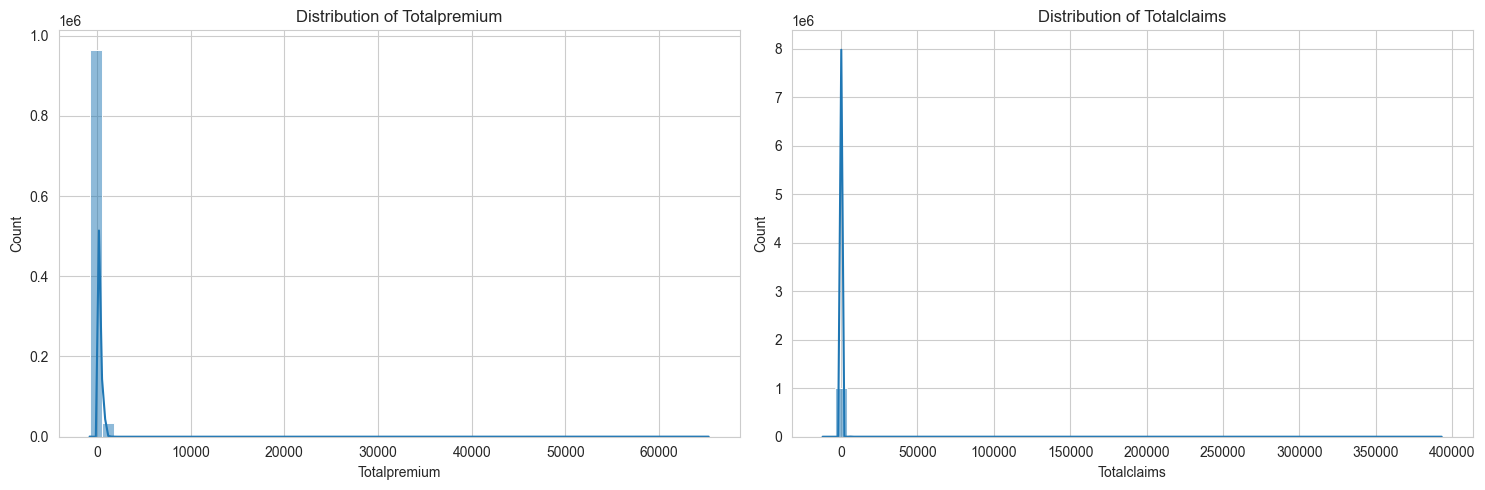

In [11]:
## Plotting Distributions (Histograms for Numerical)
plt.figure(figsize=(15, 5))

for i, col in enumerate(['totalpremium', 'totalclaims']):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=50)
    
   
    plt.title(f'Distribution of {col.title()}') 
    plt.xlabel(col.title())

plt.tight_layout()
plt.show()



In [12]:
# Calculate Loss Ratio (Loss Ratio = TotalClaims / TotalPremium)
# Handle potential division by zero if TotalPremium is zero
df['lossratio'] = df['totalclaims'] / df['totalpremium'].replace(0, np.nan)


# Overall Loss Ratio
overall_loss_ratio = df['totalclaims'].sum() / df['totalpremium'].sum()
print(f"\n--- Overall Portfolio Loss Ratio: {overall_loss_ratio:.4f} ---")

# Loss Ratio by Province
loss_ratio_province = df.groupby('province').agg(
    totalpremium=('totalpremium', 'sum'),
    totalclaims=('totalclaims', 'sum')
)
loss_ratio_province['lossratio'] = loss_ratio_province['totalclaims'] / loss_ratio_province['totalpremium']
print("\n--- loss Ratio by Province ---")
print(loss_ratio_province.sort_values(by='lossratio', ascending=False))


--- Overall Portfolio Loss Ratio: 1.0477 ---

--- loss Ratio by Province ---
               totalpremium   totalclaims  lossratio
province                                            
Gauteng        2.405377e+07  2.939415e+07   1.222018
KwaZulu-Natal  1.320908e+07  1.430138e+07   1.082693
Western Cape   9.806559e+06  1.038977e+07   1.059472
North West     7.490508e+06  5.920250e+06   0.790367
Mpumalanga     2.836292e+06  2.044675e+06   0.720897
Free State     5.213632e+05  3.549223e+05   0.680758
Limpopo        1.537324e+06  1.016477e+06   0.661199
Eastern Cape   2.140104e+06  1.356427e+06   0.633813
Northern Cape  3.165581e+05  8.949051e+04   0.282699


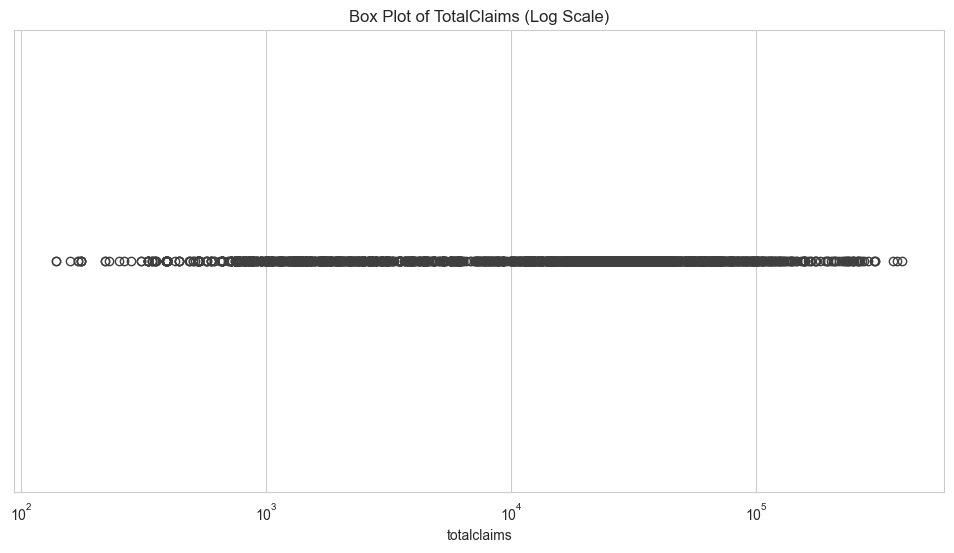

In [13]:
## Outlier Detection using Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['totalclaims'])
plt.xscale('log') # Use log scale due to heavy skewness typical in claims data
plt.title('Box Plot of TotalClaims (Log Scale)')
plt.show()



In [14]:

time_trends = df.groupby('transactionmonth').agg(
    # 1. Calculate the Total Claims Sum
    # We use 'TotalClaims' and apply the 'sum' function.
    TotalClaimsSum=('totalclaims', 'sum'),
    
    # 2. Calculate the Average Claim Severity (Mean Claim Amount)
    # We use 'TotalClaims' and apply the 'mean' function.
    AvgClaimSeverity=('totalclaims', 'mean') 
    
).reset_index()

# Print the first few rows to verify the new DataFrame structure
print(time_trends.head())

  transactionmonth  TotalClaimsSum  AvgClaimSeverity
0       2013-10-01        0.000000          0.000000
1       2013-11-01    50585.078947         42.295217
2       2013-12-01     9283.385965          6.209623
3       2014-01-01    12436.859649          6.807258
4       2014-02-01    62989.307018         30.547676


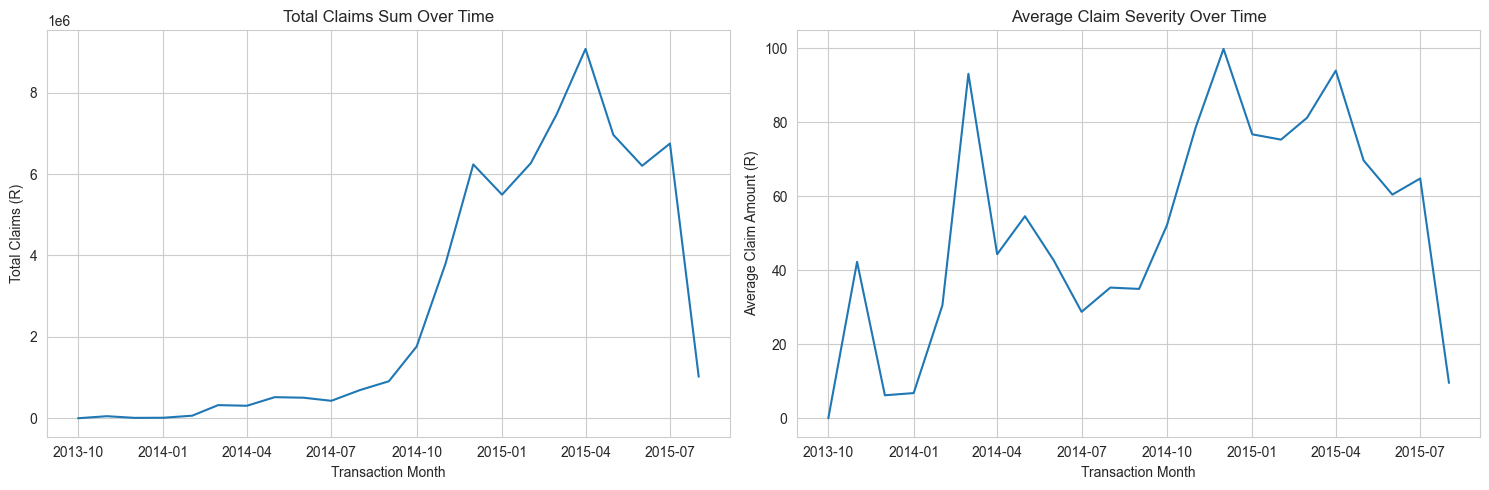

In [15]:
plt.figure(figsize=(15, 5))

# Plot Total Claims Sum over time
plt.subplot(1, 2, 1)
# Corrected 'y' column name to match the aggregation output: 'TotalClaimsSum'
sns.lineplot(data=time_trends, x='transactionmonth', y='TotalClaimsSum')
plt.title('Total Claims Sum Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Total Claims (R)')


# Plot Average Claim Severity over time
plt.subplot(1, 2, 2)
# Corrected 'y' column name to match the aggregation output: 'AvgClaimSeverity'
sns.lineplot(data=time_trends, x='transactionmonth', y='AvgClaimSeverity')
plt.title('Average Claim Severity Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Average Claim Amount (R)')

plt.tight_layout()
plt.show()

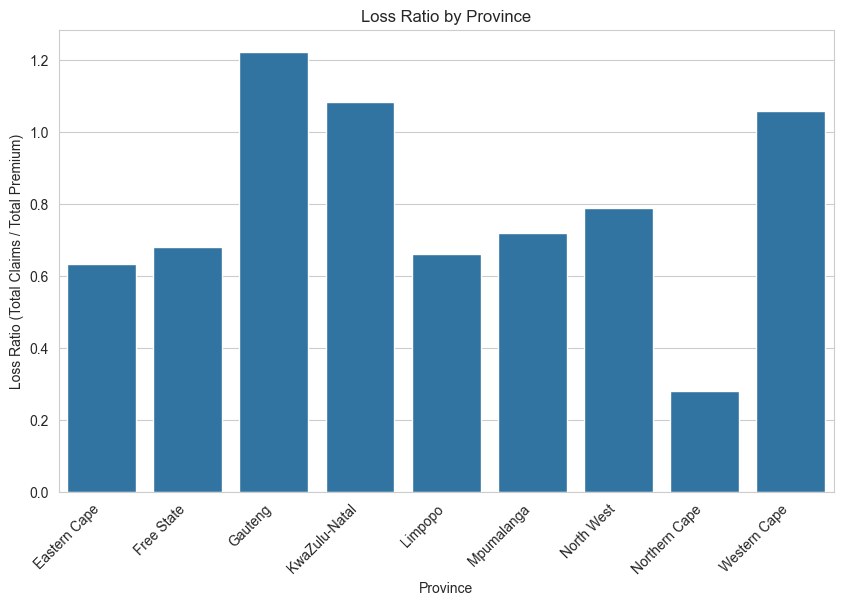

In [16]:
# Plot 1: Loss Ratio by Province (Risk by Geography)
plt.figure(figsize=(10, 6))
sns.barplot(x='province', y='lossratio', data=loss_ratio_province.reset_index())
plt.title('Loss Ratio by Province')
plt.ylabel('Loss Ratio (Total Claims / Total Premium)')
plt.xlabel('Province')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10004\3688105635.py:8: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, df['totalclaims'].quantile(0.99))


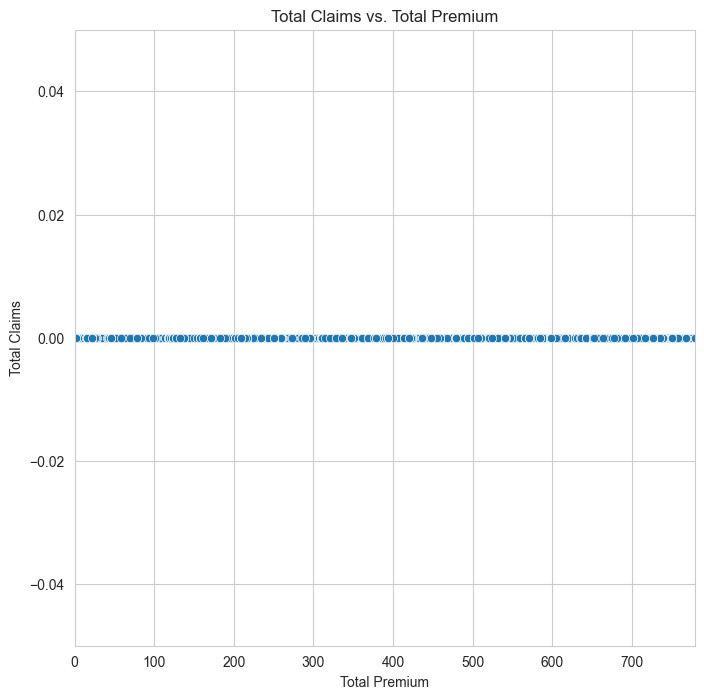

In [17]:
# Plot 2: Scatter Plot of TotalPremium vs. TotalClaims
plt.figure(figsize=(8, 8))
sns.scatterplot(x='totalpremium', y='totalclaims', data=df)
plt.title('Total Claims vs. Total Premium')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.xlim(0, df['totalpremium'].quantile(0.99)) # Limiting for better visibility
plt.ylim(0, df['totalclaims'].quantile(0.99))
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10004\1278053911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claims_by_make.index, y=claims_by_make.values, palette='viridis')


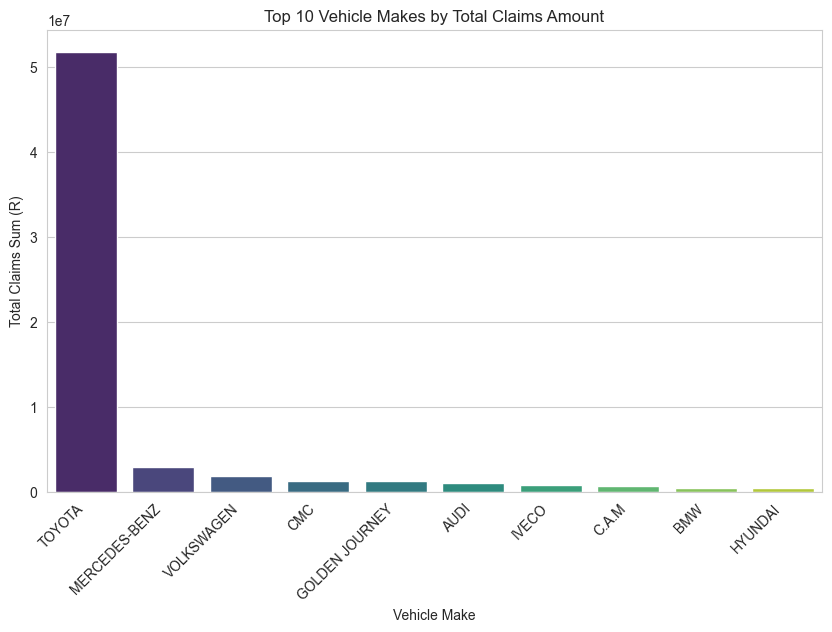

In [18]:
# Plot 3: Total Claims Sum by Top 10 Vehicle Make
claims_by_make = df.groupby('make')['totalclaims'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=claims_by_make.index, y=claims_by_make.values, palette='viridis')
plt.title('Top 10 Vehicle Makes by Total Claims Amount')
plt.ylabel('Total Claims Sum (R)')
plt.xlabel('Vehicle Make')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
# 3. Save the cleaned DataFrame to the processed folder
df.to_csv('C:/Users/USER/Desktop/Projects/Insurance Risk Analytics/Insurance-Risk-Analytics/data/processed_insurance_data.csv', index=False, sep='|')

print("\n✅ Successfully saved the CLEANED data to 'processed_insurance_data.csv'")


✅ Successfully saved the CLEANED data to 'processed_insurance_data.csv'
